Problem Statement:

Record a video or download a timelapse video of evening where the transition of day to evening or evening to night is visible clearly.

Video condition : any of below

Day to evening
Evening to Night
Night to Morning/Day

In [20]:
#!pip install opencv-python
#import cv2
#import numpy as np
#import os


# Function to categorize brightness
def categorize_brightness(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    brightness = np.mean(hsv[:, :, 2])
    if brightness > 100:  # Start with a lower threshold
        return "Day"
    elif brightness > 50:
        return "Evening"
    else:
        return "Night"

# Data Ingestion
video_path = "video.mp4"  
cap = cv2.VideoCapture(video_path)

# Create a folder named 'images' if it doesn't exist, its also optional not necessary just for R&D
output_folder = "images"
os.makedirs(output_folder, exist_ok=True)  

# Initialize counters for counting
day_count = 0
evening_count = 0
night_count = 0
total_frames = 0

# Process the video frames
while True:
    ret, frame = cap.read()
    if not ret:
        break  

    # Categorize the current frame
    category = categorize_brightness(frame)
    
    # Save the frame as an image based on its category, this step is optional not necessary, just for R&D
    if category == "Day":
        day_count += 1
        cv2.imwrite(os.path.join(output_folder, f"day_frame_{day_count}.jpg"), frame)  # Save Day frames
    elif category == "Evening":
        evening_count += 1
        cv2.imwrite(os.path.join(output_folder, f"evening_frame_{evening_count}.jpg"), frame)  # Save Evening frames
    else:
        night_count += 1
        cv2.imwrite(os.path.join(output_folder, f"night_frame_{night_count}.jpg"), frame)  # Save Night frames
    
    total_frames += 1

# Release the video capture object
cap.release()

# Print the results
print(f"Total frames: {total_frames}")
print(f"Day frames saved: {day_count}")
print(f"Evening frames saved: {evening_count}")
print(f"Night frames saved: {night_count}")

# Calculate percentages 
if total_frames > 0:
    day_percentage = (day_count / total_frames) * 100
    evening_percentage = (evening_count / total_frames) * 100
    night_percentage = (night_count / total_frames) * 100

    print(f"Day Percentage: {day_percentage:.2f}%")
    print(f"Evening Percentage: {evening_percentage:.2f}%")
    print(f"Night Percentage: {night_percentage:.2f}%")
else:
    print("No frames processed.")

Total frames: 601
Day frames saved: 326
Evening frames saved: 201
Night frames saved: 74
Day Percentage: 54.24%
Evening Percentage: 33.44%
Night Percentage: 12.31%


Threshold Conditions: 
Different lighting conditions can significantly affect the brightness of scenes and detect the specific event

Daylight: Bright, often exceeding 200 in the V channel, indicating well-lightening scenes.But due to cloudy we set less threahold as >100
Evening: Transitional lighting, where the brightness may vary significantly but often falls >50.
Night: Very low brightness, typically below 50, indicating darkness.

Visualizing the result

In [21]:
import matplotlib.pyplot as plt

"""
# Plot the percentages
plt.figure(figsize=(10, 6))
plt.bar(['Day', 'Evening', 'Night'], [day_percentage, evening_percentage, night_percentage])
plt.title('Percentage of Day, Evening, and Night Frames')
plt.xlabel('Frame Categories')
plt.ylabel('Percentage')
plt.show()
"""

"\n# Plot the percentages\nplt.figure(figsize=(10, 6))\nplt.bar(['Day', 'Evening', 'Night'], [day_percentage, evening_percentage, night_percentage])\nplt.title('Percentage of Day, Evening, and Night Frames')\nplt.xlabel('Frame Categories')\nplt.ylabel('Percentage')\nplt.show()\n"

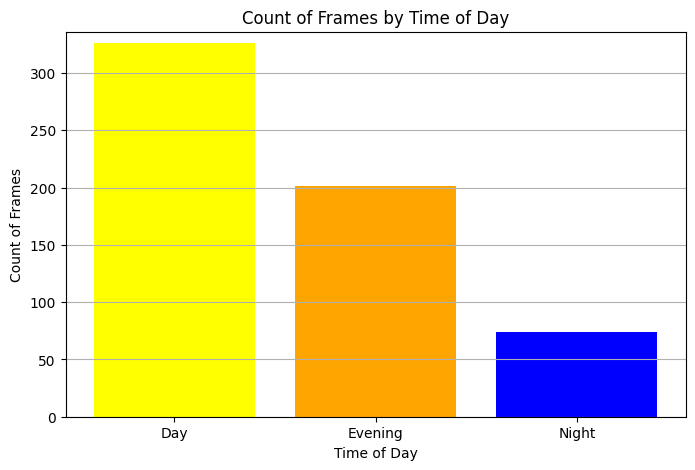

In [22]:

labels = ['Day', 'Evening', 'Night']
counts = [day_count, evening_count, night_count]
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['yellow', 'orange', 'blue'])
plt.title('Count of Frames by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count of Frames')
plt.ylim(0, max(counts) + 10) 
plt.grid(axis='y')
plt.show()



Using Grey-Scale


In [23]:
# Function to categorize brightness
def categorize_brightness(frame):
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Calculate the average brightness
    brightness = np.mean(gray_frame)  # Mean of pixel values in grayscale
    
    # Define thresholds for categorization
    if brightness > 100:  
        return "Day"
    elif brightness >50:  
        return "Evening"
    else:  
        return "Night"


# Input video file path
video_path = "video.mp4" 
cap = cv2.VideoCapture(video_path)

# Initialize counters
day_count = 0
evening_count = 0
night_count = 0
total_frames = 0

# Process the video frames
while True:
    ret, frame = cap.read()
    if not ret:
        break  

    # Categorize the current frame
    category = categorize_brightness(frame)
    
    # Increment the appropriate counter
    if category == "Day":
        day_count += 1
    elif category == "Evening":
        evening_count += 1
    else:
        night_count += 1
    
    total_frames += 1

# Release the video capture object
cap.release()

# Calculate percentages
if total_frames > 0:
    day_percentage = (day_count / total_frames) * 100
    evening_percentage = (evening_count / total_frames) * 100
    night_percentage = (night_count / total_frames) * 100

    # Print the results
    print(f"Day: {day_percentage:.2f}%")
    print(f"Evening: {evening_percentage:.2f}%")
    print(f"Night: {night_percentage:.2f}%")
else:
    print("No frames processed.")

Day: 30.62%
Evening: 56.57%
Night: 12.81%


VISUALIZATION

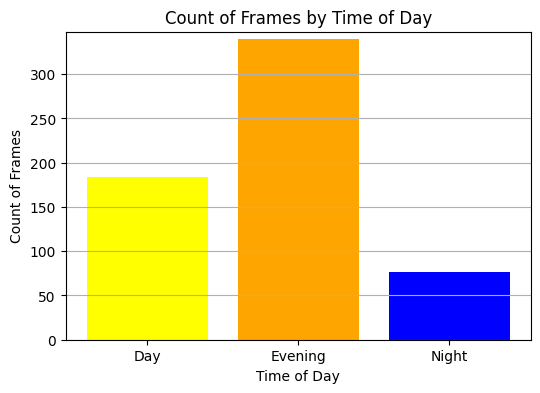

In [24]:
labels = ['Day', 'Evening', 'Night']
counts = [day_count, evening_count, night_count]
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['yellow', 'orange', 'blue'])
plt.title('Count of Frames by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count of Frames')
plt.ylim(0, max(counts) + 8) 
plt.grid(axis='y')
plt.show()

Grayscale Pixel Values

In a grayscale image, pixel values range from 0 to 255: 0 represents black (no brightness). 255 represents white (maximum brightness). Values in between represent varying shades of gray.
Categorization Logic The chosen thresholds are meant to differentiate between bright, medium, and dark conditions:

Brightness > 100: This is considered a very bright condition (likely daylight).

Brightness > 50 and ≤ 200: This represents a medium brightness, which could be interpreted as evening or
twilight conditions.

Brightness ≤ 100: This indicates low brightness, typically associated with nighttime.

USING RGB CHANNELS


In [25]:
# Function to categorize brightness based on RGB channels
def categorize_brightness_rgb(frame):
    # Split the frame into R, G, and B channels
    b, g, r = cv2.split(frame)
    
    # Calculate average brightness as the mean of R, G, B channels
    brightness = (np.mean(r) + np.mean(g) + np.mean(b)) / 3
    
    # Define thresholds for categorization
    if brightness > 100: 
        return "Day"
    elif brightness > 50: 
        return "Evening"
    else:  
        return "Night"

# Function to analyze color ratios (for example, high red content)
def analyze_color_ratios(frame):
    b, g, r = cv2.split(frame)
    total = np.sum(r) + np.sum(g) + np.sum(b)
    
    if total == 0:
        return 0, 0, 0  # Avoid division by zero
    
    red_ratio = np.sum(r) / total
    green_ratio = np.sum(g) / total
    blue_ratio = np.sum(b) / total

    return red_ratio, green_ratio, blue_ratio


# Input video file path
video_path = "video.mp4" 
cap = cv2.VideoCapture(video_path)

# Initialize counters
day_count = 0
evening_count = 0
night_count = 0
total_frames = 0

# Process the video frames
while True:
    ret, frame = cap.read()
    if not ret:
        break  

    # Categorize the current frame
    category = categorize_brightness(frame)
    
    # Increment the appropriate counter
    if category == "Day":
        day_count += 1
    elif category == "Evening":
        evening_count += 1
    else:
        night_count += 1
    
    total_frames += 1

# Release the video capture object
cap.release()

# Calculate percentages
if total_frames > 0:
    day_percentage = (day_count / total_frames) * 100
    evening_percentage = (evening_count / total_frames) * 100
    night_percentage = (night_count / total_frames) * 100

    # Print the results
    print(f"Day: {day_percentage:.2f}%")
    print(f"Evening: {evening_percentage:.2f}%")
    print(f"Night: {night_percentage:.2f}%")
else:
    print("No frames processed.")

Day: 30.62%
Evening: 56.57%
Night: 12.81%


Threshold Ranges

High Brightness (Day): A threshold above 100 signifies that the frame is bright enough to be categorized as "Day."

Medium Brightness (Evening): A threshold range of 50 to 200 captures frames that are transitioning from daylight to darkness, categorizing them as "Evening."

Low Brightness (Night): Values below 100 indicate a lack of light, categorizing frames as "Night."

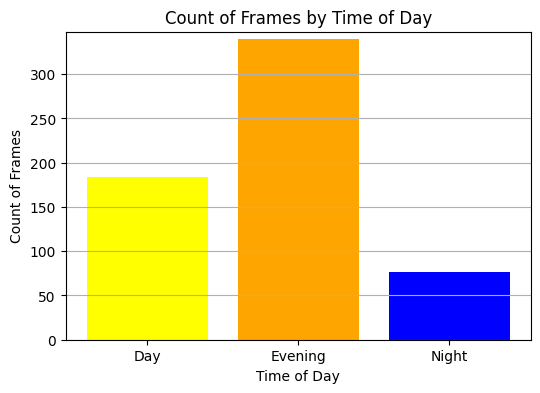

In [26]:
labels = ['Day', 'Evening', 'Night']
counts = [day_count, evening_count, night_count]
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['yellow', 'orange', 'blue'])
plt.title('Count of Frames by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count of Frames')
plt.ylim(0, max(counts) + 8) 
plt.grid(axis='y')
plt.show()